In [13]:
import numpy as np
import math
import itertools
import pandas as pd
import matplotlib.pyplot as plt

**Exercise 3, Q4**

In [7]:
def monte_carlo_simulation(n_simulations=100000):
    high_quality_given_observation = 0
    total_observations = 0

    for _ in range(n_simulations):
        steel_quality = np.random.choice([0, 1], p=[0.75, 0.25])    #  S=1 high quality, S = 0 low quality

        if steel_quality == 1:
            clips = np.random.poisson(10)  # High quality steel -> lambda = 10
            pins = np.random.poisson(10)
        else:
            clips = np.random.poisson(7)   # Low quality steel -> lambda = 7
            pins = np.random.poisson(7)

        if clips == 10 and pins == 8:
            total_observations += 1
            high_quality_given_observation += steel_quality

    probability_high_quality_given_observation = high_quality_given_observation / total_observations
    
    return probability_high_quality_given_observation

estimated_probability = monte_carlo_simulation(n_simulations=100000)
print(f"Estimated probability that the company used high-quality steel: {estimated_probability:.4f}")



Estimated probability that the company used high-quality steel: 0.3520


**Exercise 4, Q1**

In [8]:
# Exercise 4 Q1

P_D = {'d_0': 0.6, 'd_1': 0.4}
P_I = {'i_0': 0.7, 'i_1': 0.3}
P_S_given_I = {'i_0': {'s_0': 0.95, 's_1': 0.05}, 'i_1': {'s_0': 0.2, 's_1': 0.8}}
P_G_given_I_D = {
    'i_0': {'d_0': {'g_0': 0.3, 'g_1': 0.4, 'g_2': 0.3}, 'd_1': {'g_0': 0.05, 'g_1': 0.25, 'g_2': 0.7}},
    'i_1': {'d_0': {'g_0': 0.9, 'g_1': 0.08, 'g_2': 0.02}, 'd_1': {'g_0': 0.5, 'g_1': 0.3, 'g_2': 0.2}}
}
P_L_given_G = {'g_0': {'l_0': 0.1, 'l_1': 0.9}, 'g_1': {'l_0': 0.4, 'l_1': 0.6}, 'g_2': {'l_0': 0.99, 'l_1': 0.01}}

D_values = ['d_0', 'd_1']
I_values = ['i_0', 'i_1']
G_values = ['g_0', 'g_1', 'g_2']
S_values = ['s_0', 's_1']
L_values = ['l_0', 'l_1']

# Generate all combinations of the random variables
combinations = list(itertools.product(D_values, I_values, G_values, S_values, L_values))

joint_probabilities = []

for d, i, g, s, l in combinations:
    P_joint = (P_D[d] *                            
               P_I[i] *                            
               P_S_given_I[i][s] *                 
               P_G_given_I_D[i][d][g] *            
               P_L_given_G[g][l])                  
    
    joint_probabilities.append(P_joint)

joint_probabilities = np.array(joint_probabilities)

for idx, prob in enumerate(joint_probabilities):
    print(f"Combination {combinations[idx]}: Joint Probability = {prob:.6f}")

Combination ('d_0', 'i_0', 'g_0', 's_0', 'l_0'): Joint Probability = 0.011970
Combination ('d_0', 'i_0', 'g_0', 's_0', 'l_1'): Joint Probability = 0.107730
Combination ('d_0', 'i_0', 'g_0', 's_1', 'l_0'): Joint Probability = 0.000630
Combination ('d_0', 'i_0', 'g_0', 's_1', 'l_1'): Joint Probability = 0.005670
Combination ('d_0', 'i_0', 'g_1', 's_0', 'l_0'): Joint Probability = 0.063840
Combination ('d_0', 'i_0', 'g_1', 's_0', 'l_1'): Joint Probability = 0.095760
Combination ('d_0', 'i_0', 'g_1', 's_1', 'l_0'): Joint Probability = 0.003360
Combination ('d_0', 'i_0', 'g_1', 's_1', 'l_1'): Joint Probability = 0.005040
Combination ('d_0', 'i_0', 'g_2', 's_0', 'l_0'): Joint Probability = 0.118503
Combination ('d_0', 'i_0', 'g_2', 's_0', 'l_1'): Joint Probability = 0.001197
Combination ('d_0', 'i_0', 'g_2', 's_1', 'l_0'): Joint Probability = 0.006237
Combination ('d_0', 'i_0', 'g_2', 's_1', 'l_1'): Joint Probability = 0.000063
Combination ('d_0', 'i_1', 'g_0', 's_0', 'l_0'): Joint Probabili

**Exercise 5**

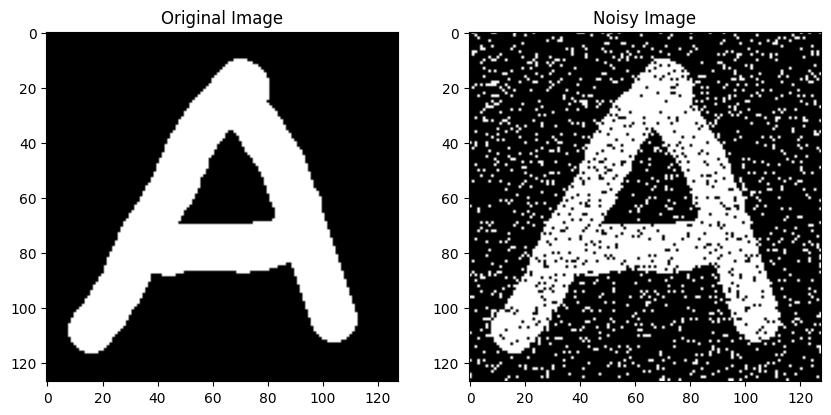

In [106]:
img = pd.read_csv('letterA.csv').to_numpy()

# Q1: simulate noisy images with varying noise levels
# mean = 0
# std = 0.5
# noise = np.random.normal(mean, std, img.shape)

# noisy_img = img + noise
# noisy_img = np.clip(noisy_img, -1, 1)

def generate_noisy_img(img, flip_probs):
    noisy_imgs = []
    for flip_prob in flip_probs:
        flip_mask = np.random.rand(*img.shape) < flip_prob
        noisy_img = img.copy()
        noisy_img[flip_mask] = -noisy_img[flip_mask]
        noisy_imgs.append(noisy_img)
        
    return noisy_imgs

noisy_imgs = generate_noisy_img(img, flip_probs = [0.1])
noisy_img = noisy_imgs[0]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray', vmin=-1, vmax=1)

plt.subplot(1, 2, 2)
plt.title("Noisy Image")
plt.imshow(noisy_img, cmap='gray', vmin=-1, vmax=1)

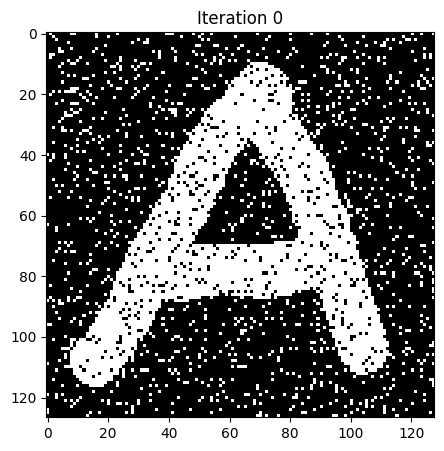

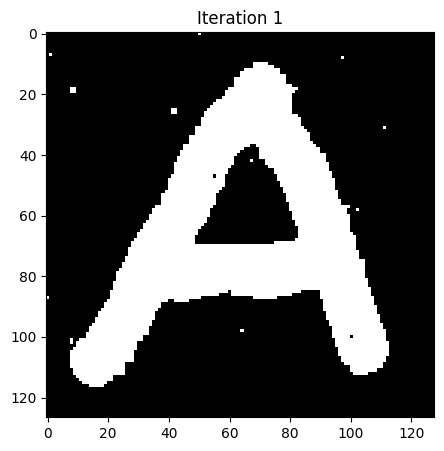

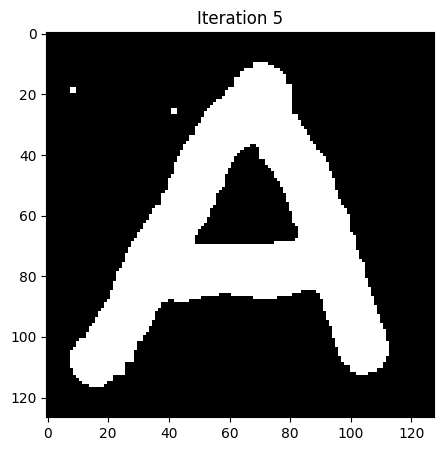

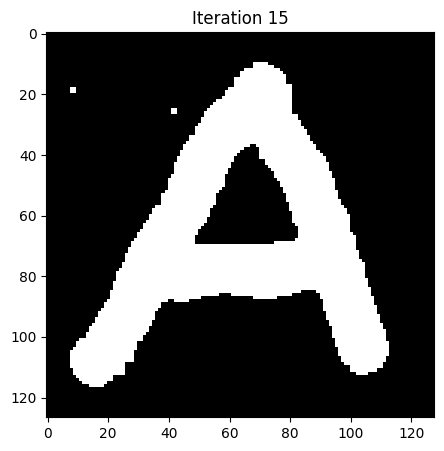

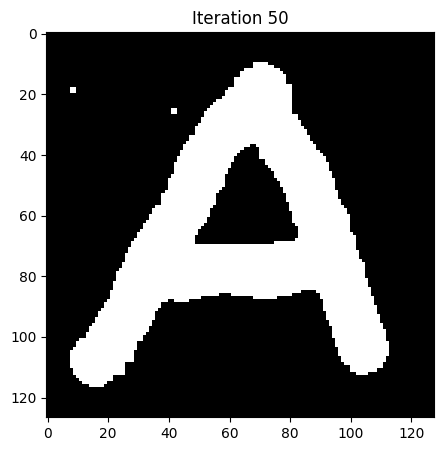

In [107]:
# Q2: implement ICM algorithm

def ICM(noisy_img, h, beta, eta, max_iter):

    x = np.copy(noisy_img)
    max_iter = max_iter

    for iteration in range(max_iter):
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                adjacent = 0
                if i > 0: adjacent += x[i - 1, j] # up
                if i < x.shape[0] - 1: adjacent += x[i + 1, j ] #down
                if j > 0: adjacent += x[i, j - 1] #left
                if j < x.shape[1] - 1: adjacent += x[i, j + 1] # right

                energy_plus1 = h * x[i,j] - beta * adjacent - eta * noisy_img[i, j]
                energy_minus1 = -h * x[i,j] + beta * adjacent + eta * noisy_img[i, j]

                x[i,j] = 1 if energy_plus1 < energy_minus1 else -1
    return x

h = 0.0
beta = 1
eta = 0.1
plot_iters = [0, 1, 5, 15, 50]
denoised_imgs = []
for iter in plot_iters:
    denoised_img = ICM(noisy_img, h, beta, eta, iter)
    denoised_imgs.append(denoised_img)
    plt.figure(figsize=(10, 5))
    plt.title(f"Iteration {iter}")
    plt.imshow(denoised_img, cmap='gray', vmin=-1, vmax=1)

Text(0.5, 1.0, 'Normalized Mean Square Error vs Flip Probability')

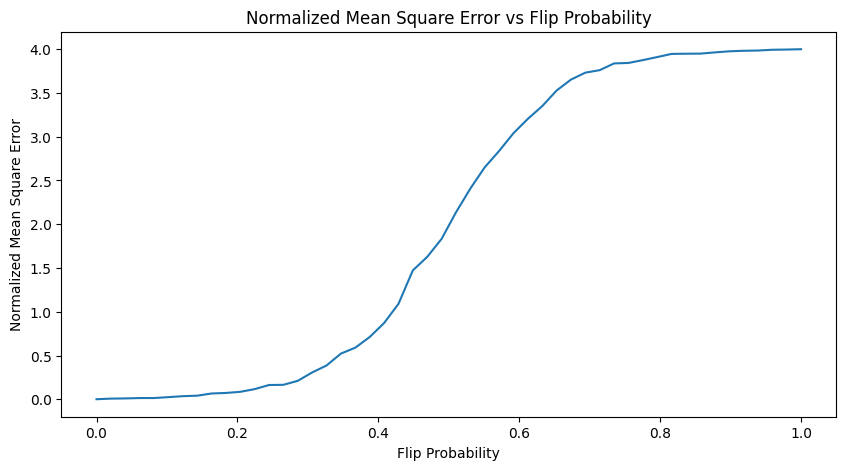

In [ ]:
# plot normalized mean square error between noised img and original img

def calc_NMSE(D, G):
    norm_G = np.linalg.norm(G)
    norm_diff = np.linalg.norm(D-G)
    return norm_diff**2 / norm_G**2


flip_probs = np.linspace(0, 1, 50)
noisy_imgs = generate_noisy_img(img, flip_probs)

h = 0
beta = 1
eta = 0.1

NMSEs = []
for noisy_img in noisy_imgs:
    denoised_img = ICM(noisy_img, h, beta, eta, max_iter = 50)
    NMSE = calc_NMSE(denoised_img, img)
    NMSEs.append(NMSE)


plt.figure(figsize=(10, 5))
plt.plot(flip_probs, NMSEs)
plt.xlabel("Flip Probability")
plt.ylabel("Normalized Mean Square Error")
plt.title("Normalized Mean Square Error vs Flip Probability")

Text(0.5, 1.0, 'Normalized Mean Square Error vs h, with beta = 1, eta = 0.1')

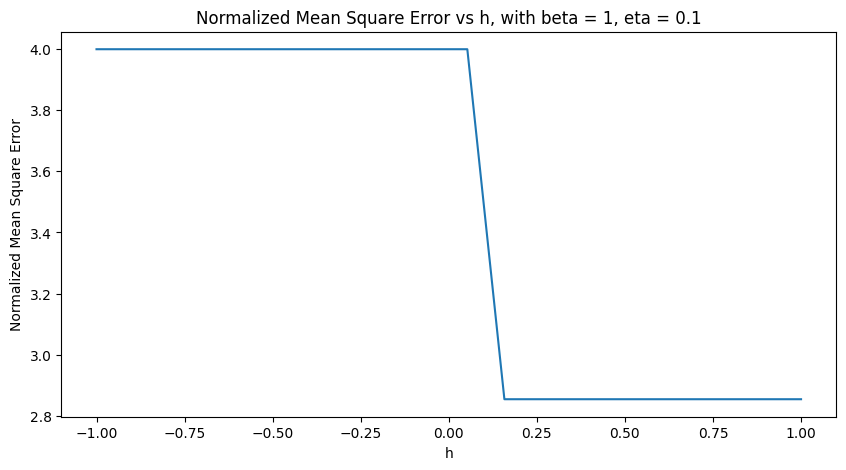

In [ ]:
# plot NMSE vs h

h_values = np.linspace(-1, 1, 20)
beta = 1
eta = 0.1
NMSEs = []

for h in h_values:
    denoised_img = ICM(noisy_img, h, beta, eta, max_iter = 50)
    NMSE = calc_NMSE(denoised_img, img)
    NMSEs.append(NMSE)

plt.figure(figsize=(10, 5))
plt.plot(h_values, NMSEs)
plt.xlabel("h")
plt.ylabel("Normalized Mean Square Error")
plt.title(f"Normalized Mean Square Error vs h, with beta = {beta}, eta = {eta}")

Text(0.5, 1.0, 'Normalized Mean Square Error vs beta, with h = 0, eta = 0.1')

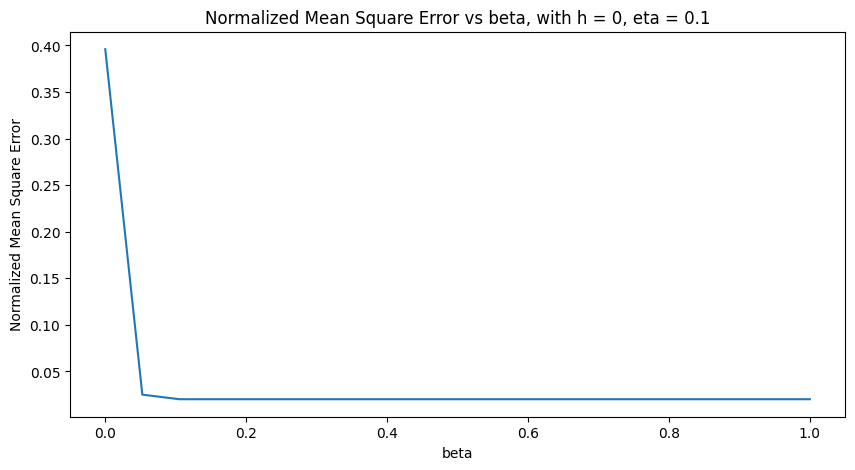

In [108]:
# plot NMSE vs beta

beta_values = np.linspace(0, 1, 20)
h = 0
eta = 0.1
NMSEs = []

for beta in beta_values:
    denoised_img = ICM(noisy_img, h, beta, eta, max_iter = 50)
    NMSE = calc_NMSE(denoised_img, img)
    NMSEs.append(NMSE)

plt.figure(figsize=(10, 5))
plt.plot(beta_values, NMSEs)
plt.xlabel("beta")
plt.ylabel("Normalized Mean Square Error")
plt.title(f"Normalized Mean Square Error vs beta, with h = {h}, eta = {eta}")

Text(0.5, 1.0, 'Normalized Mean Square Error vs eta, with h = 0, beta = 1')

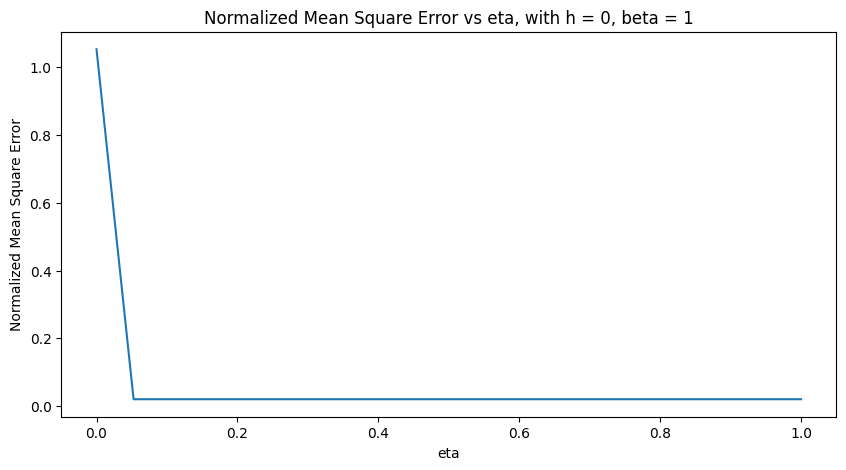

In [109]:
# plot NMSE vs eta

eta_values = np.linspace(0, 1, 20)
h = 0
beta = 1
NMSEs = []

for eta in eta_values:
    denoised_img = ICM(noisy_img, h, beta, eta, max_iter = 50)
    NMSE = calc_NMSE(denoised_img, img)
    NMSEs.append(NMSE)

plt.figure(figsize=(10, 5))
plt.plot(eta_values, NMSEs)
plt.xlabel("eta")
plt.ylabel("Normalized Mean Square Error")
plt.title(f"Normalized Mean Square Error vs eta, with h = {h}, beta = {beta}")